In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Create a Pandas Dataframe of the counts of each tag in the dataset of puzzles
from pandas import Series
#Read Puzzle Data CSV into tag_data and drop puzzles that don't have any tags
tag_data = pd.read_csv('../tactics_problem.csv')
tag_data = tag_data.loc[(tag_data['tags'].isna() == False)]
#Create tag_counts, a dataframe of tags and how many times they appear in the dataset
tag_counts = pd.concat([Series(row['tactics_problem_id'], str(row['tags']).split(',')) 
                        for _, row in tag_data.iterrows()]).reset_index()
tag_counts.rename(columns={'index':'tag',0:'tactics_problem_id'}, inplace=True)
tag_counts = tag_counts.groupby('tag')['tactics_problem_id'].nunique().to_frame()
tag_counts.rename(columns={'tactics_problem_id':'count'},inplace=True)
#Set up a dictionary of tags and their counts
count_dic = tag_counts.to_dict('index')
for tag in count_dic:
    count_dic[tag] = count_dic[tag]['count']

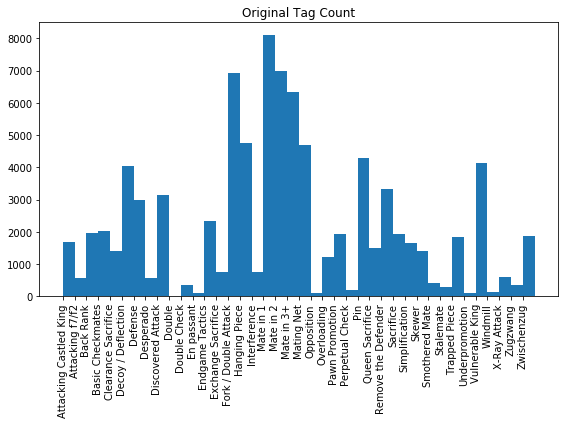

In [4]:
#Create function, plot_tag_counts, that creates a histogram of tag counts in the given count_dictionary
import matplotlib.pyplot as plt
def plot_tag_counts(count_dictionary,label):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(count_dictionary.keys(), count_dictionary.values(), 1,align='edge')
    ax.set_xticklabels(count_dictionary,rotation='vertical')
    plt.title(label)
    plt.tight_layout()
    plt.savefig('../plots/' + label + '.png')
    plt.show()
plot_tag_counts(count_dic,'Original Tag Count')

In [5]:
#Plot results from taking the first tag in the tag field
def get_first_tag(row):
    tags = str(row['tags']).split(',')
    return tags[0]

new_tag_data = tag_data.copy()
new_tag_data['tag'] = new_tag_data.apply(lambda row: get_first_tag(row),axis=1)
#Create new_tag_counts and new_count_dic which serve the same function as tag_counts and and count_dic respectively
new_tag_counts = new_tag_data.groupby('tag')['tactics_problem_id'].nunique().to_frame()
new_tag_counts.rename(columns={'tactics_problem_id':'count'},inplace=True)
new_count_dic = new_tag_counts.to_dict('index')
for tag in new_count_dic:
    new_count_dic[tag] = new_count_dic[tag]['count']

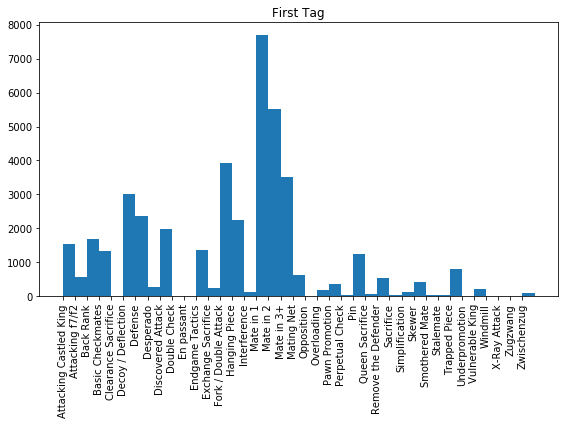

In [6]:
plot_tag_counts(new_count_dic,'First Tag')

In [7]:
#Create new dataframe, new_tag_data, where puzzles that have multiple tags now
#contain the tag that has minimum count in count_dic
def get_first_tag(row):
    tags = str(row['tags']).split(',')
    smallest = 100000
    for tag in tags:
        count = count_dic[tag]
        if count < smallest:
            smallest = count
            min_tag = tag
    count_dic[min_tag]
    return min_tag

new_tag_data = tag_data.copy()
new_tag_data['tag'] = new_tag_data.apply(lambda row: get_first_tag(row),axis=1)
#Create new_tag_counts and new_count_dic which serve the same function as tag_counts and and count_dic respectively
new_tag_counts = new_tag_data.groupby('tag')['tactics_problem_id'].nunique().to_frame()
new_tag_counts.rename(columns={'tactics_problem_id':'count'},inplace=True)
new_count_dic = new_tag_counts.to_dict('index')
for tag in new_count_dic:
    new_count_dic[tag] = new_count_dic[tag]['count']

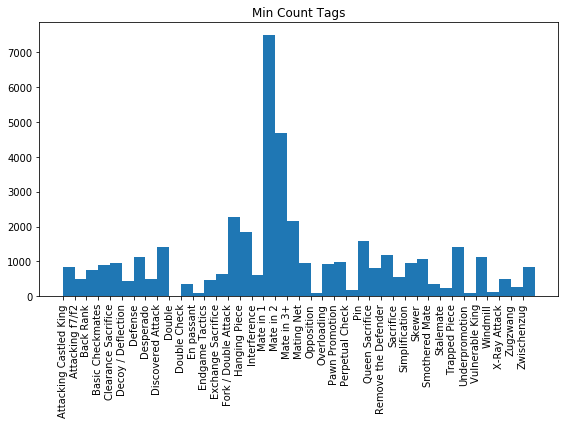

In [8]:
plot_tag_counts(new_count_dic,'Min Count Tags')

In [9]:
new_tag_data.to_csv(
        "../tactics_problem_singletag.csv",
        encoding='utf-8',
        index=False
    )

In [10]:
def calc_avg(dic):
    n = len(dic)
    return sum(dic.values())/n
print(calc_avg(count_dic))
print(calc_avg(new_count_dic))

2196.275
1056.925


In [11]:
#Wanted to see what the overall effect was on the count of the tags
#The result is unsurprisingly that the average count when down when comparing the two
#This is because in the original count every ID might have more than tag assigned to it unlike the second

total_shift = 0

for tag in count_dic:
    count = count_dic[tag]
    new_count = new_count_dic[tag]
    diff = count - new_count
    if diff != 0:
        total_shift += diff/abs(diff)
    if(total_shift > 0):
        print('Count decreased for ' + tag)
    else:
        print('Count increased for ' + tag)
print(total_shift)

Count decreased for Attacking Castled King
Count decreased for Attacking f7/f2
Count decreased for Back Rank
Count decreased for Basic Checkmates
Count decreased for Clearance Sacrifice
Count decreased for Decoy / Deflection
Count decreased for Defense
Count decreased for Desperado
Count decreased for Discovered Attack
Count decreased for Double
Count decreased for Double Check
Count decreased for En passant
Count decreased for Endgame Tactics
Count decreased for Exchange Sacrifice
Count decreased for Fork / Double Attack
Count decreased for Hanging Piece
Count decreased for Interference
Count decreased for Mate in 1
Count decreased for Mate in 2
Count decreased for Mate in 3+
Count decreased for Mating Net
Count decreased for Opposition
Count decreased for Overloading
Count decreased for Pawn Promotion
Count decreased for Perpetual Check
Count decreased for Pin
Count decreased for Queen Sacrifice
Count decreased for Remove the Defender
Count decreased for Sacrifice
Count decreased for